In [32]:
import numpy as np
from numpy import array as arr
from scipy.stats import chi2
from tabulate import tabulate

In [4]:
import sys
import socket
if socket.gethostname() == 'Birks-iMac.fritz.box':
    sys.path.append('/Users/Birk/Documents/Programmieren/Python/Eigener Code')
else:
    sys.path.append('/Home/ab227/linux/Eigener Code')
from pap import *
from pap import _rundung, _istbool

# pap.chi_quadrat_odr Entwicklung

In [144]:
def chi_quadrat_odr(fitfunktion, parameter, messpunkte, messfehler):
    # Anzahl x-Werte bestimmen
    if messfehler[messfehler <= 0].size != 0:
        print('messfehler darf keine Fehler enthalten, die 0 oder negativ sind!')
        return
    x_fehler_min = np.min(messfehler[0])
    x_wert_min = messpunkte[0][0] - 10 * messfehler[0][0]
    x_wert_max = messpunkte[0][-1] + 10 * messfehler[0][-1]
    anzahl_x_werte = np.int((x_wert_max - x_wert_min) / x_fehler_min * 10)
    # print(anzahl_x_werte)
    anzahl_max = 1e7
    if anzahl_x_werte > anzahl_max:
        anzahl_x_werte = anzahl_max
        
    x_werte = np.linspace(x_wert_min, x_wert_max, anzahl_x_werte)
    fitwerte = fitfunktion(x_werte, *parameter)
    
    abstände_alle = np.linalg.norm(arr([(messpunkte[0][:, np.newaxis] - x_werte) 
                                        / messfehler[0][:, np.newaxis], 
                                        (messpunkte[1][:, np.newaxis] - fitwerte) 
                                        / messfehler[1][:, np.newaxis]]), axis = 0)
    abstände_min = np.min(abstände_alle, axis = 1)
    
    anzahl_parameter = len(parameter)
    anzahl_messwerte = np.shape(messpunkte)[1]
    
    chi_quadrat = np.sum(abstände_min**2)
    freiheitsgrade = anzahl_messwerte - anzahl_parameter
    chi_quadrat_reduziert = chi_quadrat / freiheitsgrade 
    fit_wahrscheinlichkeit = (1 - chi2.cdf(chi_quadrat, freiheitsgrade)) * 100

    print(f"χ^2_reduziert         = {chi_quadrat_reduziert:.2f}") 
    print(f"Fitwahrscheinlichkeit = {fit_wahrscheinlichkeit:.1f}%")
    
    #% For development only
    return x_werte

## Tests

In [148]:
messpunkte = arr([[-8, -5.5, -2.1, 1, 1.4, 3.2, 4.5], [40, 20.8, 3.1, 0.5, 1.5, 3, 6]])
messfehler = arr([[0.9, 0.5, 0.2, 0.5, 0.3, 0.09, 0.03], [5, 7.3, 4.2, 2.3, 2.3, 4.1, 4.4]])
parameter = arr([0.5, 0, -2])

x_werte = chi_quadrat_odr(quad_func, parameter, messpunkte, messfehler)
fitwerte = quad_func(x_werte, *parameter)

χ^2_reduziert         = 1.19
Fitwahrscheinlichkeit = 31.3%


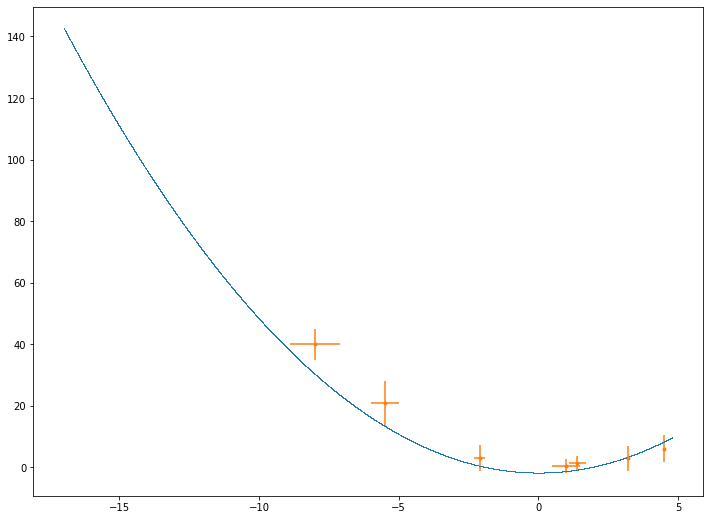

In [151]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 9))
plt.plot(x_werte, fitwerte, ',')
plt.errorbar(messpunkte[0], messpunkte[1], messfehler[1], messfehler[0], fmt = '.');